# Machine Learning Homework: Predicting House Energy Consumption

This notebook is your homework assignment to predict house energy consumption using regression models. You'll work with a dataset (`house_energy_data.csv`) containing features like house size, number of rooms, and other factors to predict energy consumption in kWh.

## Objectives
- Understand data preprocessing and feature engineering.
- Train and evaluate multiple regression models.
- Compare model performance using Mean Squared Error (MSE) and K-Fold Cross-Validation.
- Visualize predictions and model performance.

## Instructions
- Complete the **TODO** tasks in each section.
- Run each code cell after filling in your code.
- Analyze the results and answer any questions in the Markdown cells.
- Submit this notebook with your code and outputs.

Let's get started!

## 1. Setup and Imports

In this section, we import the necessary Python libraries for data analysis, preprocessing, modeling, and visualization. These include:
- **NumPy** and **Pandas** for data manipulation.
- **Matplotlib** for plotting.
- **Scikit-learn** for machine learning models, preprocessing, and evaluation.

**TODO**: Review the imported libraries and ensure you understand their purpose.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# TODO: Add a comment explaining the purpose of one library (e.g., sklearn.metrics)
# Your comment here:
#The sklearn.metrics module implements several loss, score, and utility functions to measure classification performance.

## 2. Load and Explore the Dataset

We load the dataset `house_energy_data.csv`, which contains features (e.g., house size, location) and the target variable `energy_consumption_kwh`. Exploring the dataset helps understand its structure and identify any issues like missing values.

**TODO**:
- Display the first few rows of the dataset.
- Check for missing values and write a comment summarizing your findings.
- (Optional) Plot a histogram of `energy_consumption_kwh` to understand its distribution.

   house_size  avg_temperature  num_occupants  appliance_count region_type  \
0  169.868566        11.710050              4               19       rural   
1  144.469428        14.398190              4               15    suburban   
2  175.907542        27.472936              5               14       urban   
3  210.921194        26.103703              2               13    suburban   
4  140.633865        19.790984              3               17       rural   

  heating_type  energy_consumption_kwh  
0     electric              448.022881  
1          gas              345.869591  
2          gas              420.599602  
3     electric              466.494238  
4        solar              134.196547  

Missing values:
 house_size                0
avg_temperature           0
num_occupants             0
appliance_count           0
region_type               0
heating_type              0
energy_consumption_kwh    0
dtype: int64


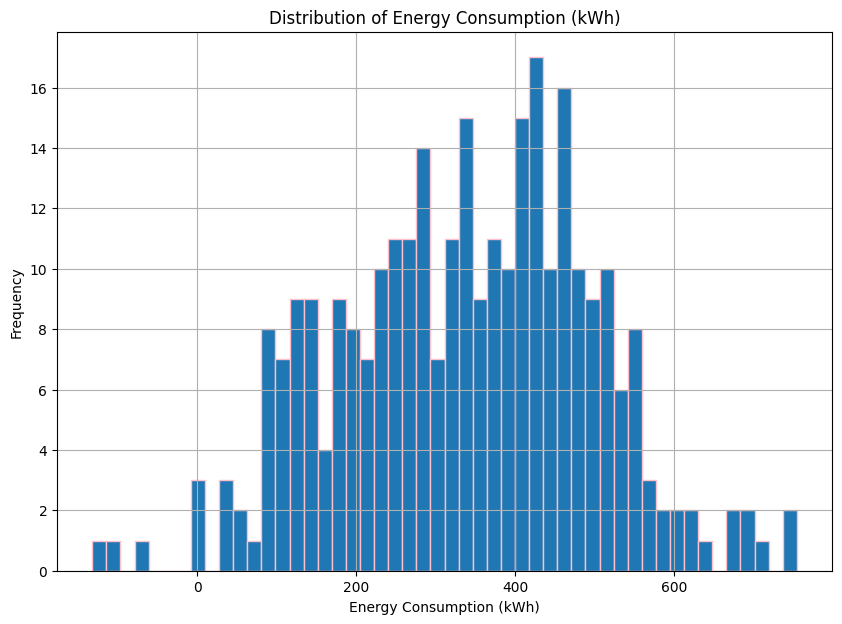

In [28]:
# Load dataset
df = pd.read_csv("house_energy_data.csv")
print(df.head())

# TODO: Check for missing values
# Your code here:
missing_values = df.isnull().sum()
print("\nMissing values:\n", missing_values)

# TODO: Write a comment summarizing your findings on missing values
# Your comment here:
# Based on the output above, most columns show 0 missing values, that means the dataset is complete.

# TODO (Optional): Plot a histogram of the target variable 'energy_consumption_kwh'
# Your code here:
plt.figure(figsize=(10, 7))
plt.hist(df['energy_consumption_kwh'], bins=50, edgecolor='pink')
plt.title('Distribution of Energy Consumption (kWh)')
plt.xlabel('Energy Consumption (kWh)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## 3. Split Features and Target

We separate the dataset into features (`X`) and the target variable (`y`). We also identify numeric and categorical columns for preprocessing.

**TODO**:
- After splitting, print the names of the numeric and categorical columns.
- Explain why separating numeric and categorical columns is important for preprocessing.

In [ ]:
# Split features and target
X = df.drop("energy_consumption_kwh", axis=1)
y = df["energy_consumption_kwh"]

# Identify numeric and categorical columns
num_cols = X.select_dtypes(include=np.number).columns.tolist()
cat_cols = X.select_dtypes(exclude=np.number).columns.tolist()

# TODO: Print numeric and categorical column names
# Your code here:
print("numeric:\n", num_cols)
print("\ncategorical\n", cat_cols)

# TODO: Write a comment explaining why separating numeric and categorical columns is important
# Your comment here:
# Because they need different requirments.

numeric:
 ['house_size', 'avg_temperature', 'num_occupants', 'appliance_count']

categorical
 ['region_type', 'heating_type']


## 4. Preprocessing Pipeline

We create a preprocessing pipeline to handle numeric and categorical features differently:
- **Numeric features**: Standardized using `StandardScaler` to have zero mean and unit variance.
- **Categorical features**: Encoded using `OneHotEncoder` to convert categories into binary columns.

**TODO**:
- Explain in a comment why we use `drop='first'` in `OneHotEncoder`.
- (Optional) Suggest another preprocessing step we could add (e.g., handling outliers).

In [ ]:
# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(drop='first'), cat_cols)
])

# TODO: Explain why we use drop='first' in OneHotEncoder
# Your comment here:
# If we do not use drop_first = True, then n dummy variables will be created, 
# and these predictors (n dummy variables) are themselves correlated which is known
# as multicollinearity and it, in turn, leads to Dummy Variable Trap.

# TODO (Optional): Suggest another preprocessing step
# Your comment here:


## 5. Train/Test Split

We split the data into training (80%) and testing (20%) sets to evaluate model performance on unseen data.

**TODO**:
- Print the shapes of `X_train`, `X_test`, `y_train`, and `y_test`.
- Explain why we set `random_state=42`.

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TODO: Print the shapes of the train and test sets
# Your code here:
print("X_train\n:", X_train)
print("X_test\n:", X_test)
print("y_train\n:", y_train)
print("y_test\n:", y_test)

# TODO: Explain why we use random_state=42
# Your comment here:
# https://grsahagian.medium.com/what-is-random-state-42-d803402ee76b
# https://en.wikipedia.org/wiki/The_Hitchhiker%27s_Guide_to_the_Galaxy
# If you don't specify the random_state in your code, then every time you 
# run(execute) your code a new random value is generated and the train and 
# test datasets would have different values each time. However, if a fixed 
# value is assigned like random_state = 42 then no matter how many times you
#  execute your code the result would be the same .i.e, same values in train and test datasets.


X_test
:      house_size  avg_temperature  num_occupants  appliance_count region_type  \
203  192.152082        25.629692              1                6       rural   
266  215.296452        -0.381245              1               13       urban   
152  122.799011        10.142740              4                8    suburban   
9    171.702402        17.978073              2                5    suburban   
233  123.935986         7.889838              3                6       urban   
226  152.571201         3.724576              2               16    suburban   
196  114.645703         9.627538              3               17       rural   
109  147.022163        25.144388              2               18    suburban   
5    140.634522        21.173274              3               14       urban   
175  183.087330        17.509640              4               11       rural   
237  157.458173        16.154445              3               17    suburban   
57   137.631505        17.11341

## 6. Define Regression Models

We define four regression models:
1. **Linear Regression**: A simple linear model.
2. **Polynomial Regression (degree=2)**: Captures non-linear relationships.
3. **Ridge Regression**: Regularized to prevent overfitting.
4. **Lasso Regression**: Regularized with feature selection.

**TODO**:
- Add a new model to the `models` dictionary (e.g., Ridge with a different `alpha` value).
- Explain in a comment the difference between Ridge and Lasso regularization.

In [43]:
# Define models

# 1️⃣ Linear Regression
linear_model = Pipeline([
    ("preprocess", preprocessor),
    ("regressor", LinearRegression())
])

# 2️⃣ Polynomial Regression (degree = 2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
polynomial_model = Pipeline([
    ("preprocess", preprocessor),
    ("poly", poly_features),
    ("regressor", LinearRegression())
])

# 3️⃣ Ridge Regression (regularization)
ridge_model = Pipeline([
    ("preprocess", preprocessor),
    ("regressor", Ridge(alpha=1.0))
])

# 4️⃣ Lasso Regression (regularization + feature selection)
lasso_model = Pipeline([
    ("preprocess", preprocessor),
    ("regressor", Lasso(alpha=0.1))
])

# Store models in dictionary
models = {
    "Linear Regression": linear_model,
    "Polynomial Regression (degree=2)": polynomial_model,
    "Ridge Regression": ridge_model,
    "Lasso Regression": lasso_model
}

# TODO: Add a new model (e.g., Ridge with alpha=10.0) to the models dictionary
# Your code here:
models["Ridge Regression (alpha=10.0)"] = Pipeline([
    ("preprocess", preprocessor),
    ("regressor", Ridge(alpha=10.0))
])
print(models)

# TODO: Explain the difference between Ridge and Lasso regularization
# Your comment here:
# Lasso (L1 regularization) performs feature selection by shrinking some coefficients to exactly zero, 
# while Ridge (L2 regularization) shrinks all coefficients towards zero but never sets them to zero.

{'Linear Regression': Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['house_size',
                                                   'avg_temperature',
                                                   'num_occupants',
                                                   'appliance_count']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['region_type',
                                                   'heating_type'])])),
                ('regressor', LinearRegression())]), 'Polynomial Regression (degree=2)': Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['house_size',
                                                   'avg_tempera

## 7. Visual Hint: Expected Model Performance Plot

Below is a placeholder for what your model performance comparison plot might look like. This bar chart will compare the Train MSE, Test MSE, and K-Fold CV MSE for each model. Aim for a similar output in the next section.

![Sample MSE Comparison Plot](mse_comparison_placeholder.png)

**Note**: This is a placeholder. Your actual plot will be generated in the next section.

## 8. Train and Evaluate Models

We train each model, compute predictions, and evaluate performance using Mean Squared Error (MSE) on training and test sets. We also perform 5-fold cross-validation to assess generalization.

**TODO**:
- Complete the loop to compute MSE for the training and test sets.
- Interpret the results in a Markdown cell after the code (e.g., which model performed best?).
- (Optional) Modify the scatter plot to change the marker color or size.


🔹 Training Linear Regression...


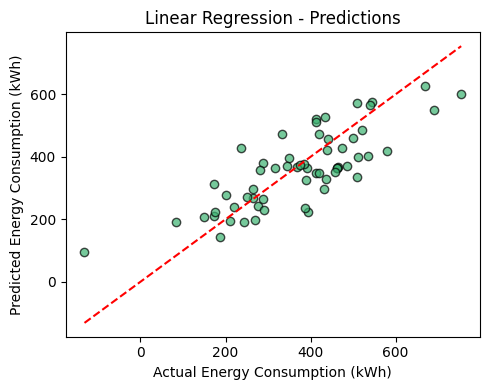


🔹 Training Polynomial Regression (degree=2)...


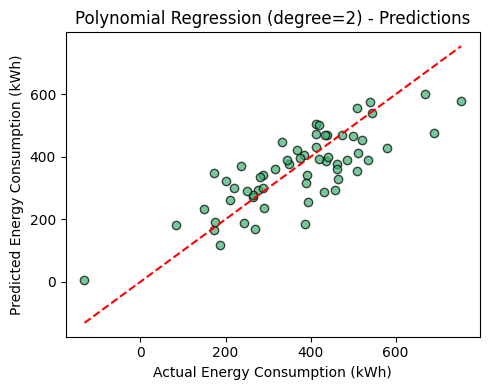


🔹 Training Ridge Regression...


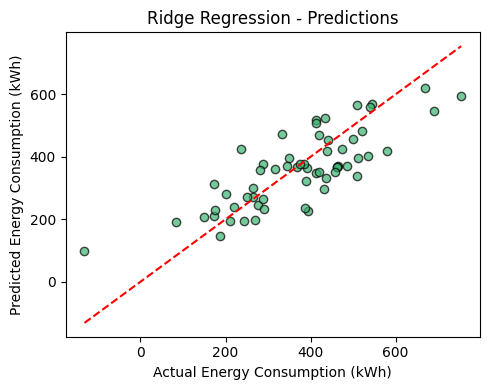


🔹 Training Lasso Regression...


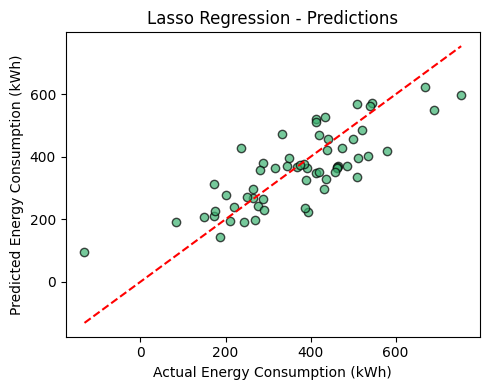


🔹 Training Ridge Regression (alpha=10.0)...


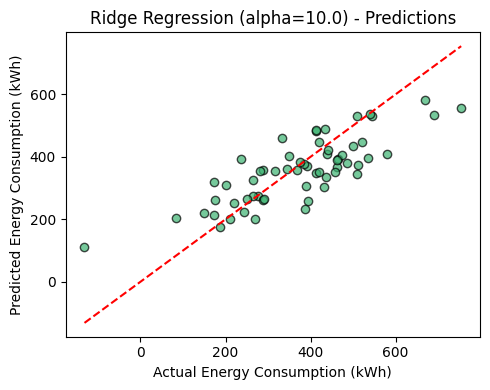


📊 Model Performance Summary:
                              Model     Train MSE     Test MSE  K-Fold CV MSE
0                 Linear Regression  10306.455553  8528.514886   10550.252714
1  Polynomial Regression (degree=2)   8997.289244  8558.717335   11631.670253
2                  Ridge Regression  10314.308227  8452.486690   10548.835906
3                  Lasso Regression  10306.865560  8517.844011   10550.548051
4     Ridge Regression (alpha=10.0)  10751.548311  8457.094352   10894.823070


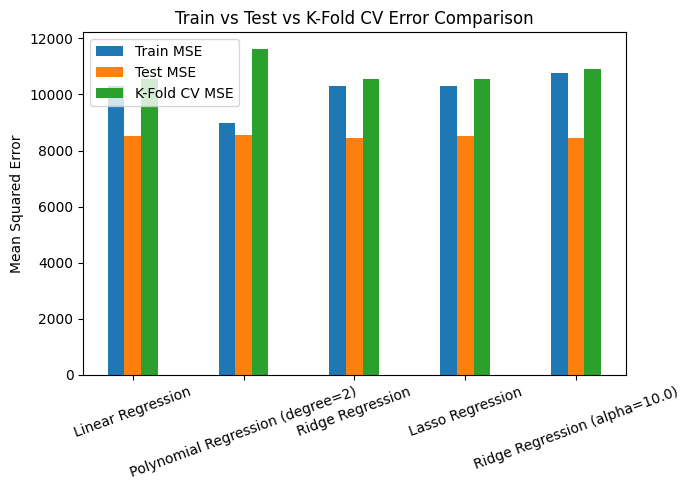

In [58]:
# Train and evaluate
results = []

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(X_train, y_train)

    # TODO: Compute predictions for training and test sets
    # Your code here:
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # TODO: Compute Mean Squared Error for training and test sets
    # Your code here:
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    # K-Fold Cross Validation (K=5)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring="neg_mean_squared_error")
    cv_mse = -cv_scores.mean()

    results.append({
        "Model": name,
        "Train MSE": mse_train,
        "Test MSE": mse_test,
        "K-Fold CV MSE": cv_mse
    })

    # Plot predictions (test data)
    plt.figure(figsize=(5,4))
    plt.scatter(y_test, y_test_pred, color='mediumseagreen', alpha=0.7, edgecolor='k')
    plt.xlabel("Actual Energy Consumption (kWh)")
    plt.ylabel("Predicted Energy Consumption (kWh)")
    plt.title(f"{name} - Predictions")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.tight_layout()
    plt.show()

# Compare results
results_df = pd.DataFrame(results)
print("\n📊 Model Performance Summary:")
print(results_df)

# Bar chart comparison
plt.figure(figsize=(7,5))
x = np.arange(len(results_df))
bar_width = 0.15

plt.bar(x - bar_width, results_df["Train MSE"], width=bar_width, label="Train MSE")
plt.bar(x, results_df["Test MSE"], width=bar_width, label="Test MSE")
plt.bar(x + bar_width, results_df["K-Fold CV MSE"], width=bar_width, label="K-Fold CV MSE")

plt.xticks(x, results_df["Model"], rotation=20)
plt.ylabel("Mean Squared Error")
plt.title("Train vs Test vs K-Fold CV Error Comparison")
plt.legend()
plt.tight_layout()
plt.show()

## 9. Analysis and Questions

**TODO**:
- Which model had the lowest Test MSE? Why do you think it performed best?
- Compare the Train MSE and Test MSE. Is there any evidence of overfitting?
- How does the K-Fold CV MSE compare to the Test MSE? Why might they differ?
- Suggest one way to improve the models (e.g., tuning hyperparameters, adding features).

Your answers here:

1. **Lowest Test MSE**: the Ridge Regression (alpha=10.0)
2. **Overfitting Evidence**: Train MSE was lower than the Test MSE
3. **K-Fold CV vs Test MSE**: K-Fold CV MSE is often close to the Test MSE and the Test MSE depends on one specific train-test split
4. **Improvement Suggestion**: adding new variables (e.g. weather data) that explain energy consumption better